<a href="https://colab.research.google.com/github/zcvpal2/Aiffel-follow-deep-learning/blob/main/aiffle_8_%EC%B9%B4%EB%A9%94%EB%9D%BC_%EC%8A%A4%ED%8B%B0%EC%BB%A4_%EC%95%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 사람의 얼굴을 인지하는 프로그램을 만들기 위해서는
## 눈 코입 귀 등의 각각 위치를 아는 것이 중요핟
### 이런 것을 랜드마크, 조정 이라고 한다

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


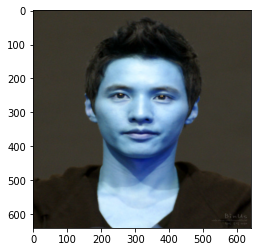

In [14]:
import os
my_image_path = '/content/drive/MyDrive/AIFFEL/cameta_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기 (원빈 사진)
img_bgr = cv2.resize(img_bgr, (640, 640))    # 640x360의 크기로 Resize 해보았으나, 이미지 상 검출이 잘 안되서 640x640
img_show = img_bgr.copy()      #출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

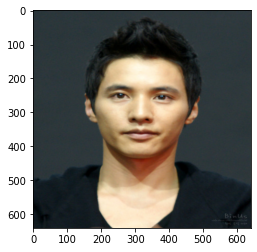

In [15]:
### opencv 는 이미지 체널을 RGB가 아니라 BGR로 사용해서 색상이 좀 이상하게 나온다
# 그렇기 때문에 RGB 이미지로 바꿔야 한다 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [16]:
# https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html
# object detection 기술을 이용해서 얼굴의 위치 찾기 
# HOG SVM 알고리즘 이용 https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c


In [17]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # detector 

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # rgb로 바꾼 것을
dlib_rects = detector_hog(img_rgb, 1)   #(이미지, 이미지 피라미드 수)
## cf) 이미지를 upsampling 하여 크기 키우는 것을 이미지 피라미드 라고 한다. https://opencv-python.readthedocs.io/en/latest/doc/14.imagePyramid/imagePyramid.html

rectangles[[(171, 171) (438, 439)]]


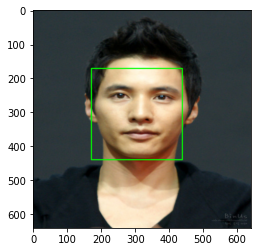

In [18]:
print(dlib_rects)   # 얼굴 영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [13]:
# dlib.rectangles 는 dlib.rectangle 객체의 배열형태로 이루어져 있다.
# left(), top(), right(), bottom(), height(), width() 등의 변수가 있음